A company has gathered data on salaries, company names, job roles, and educational qualifications of employees. The dataset includes information about whether each employee's salary exceeds $100k (1) or not (0). Using this data, the company aims to build a decision tree classification model to predict whether a new employee, based on their company, job role, and degree, is likely to have a salary exceeding $100k.


In [208]:
#importing necessary files
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [209]:
#reading the file in dataframe
dataframe=pd.read_csv("salaries.csv")
dataframe

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [210]:
#analyzing the data (checking for null values)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 644.0+ bytes


In [211]:
#doing the label encoding for converting categorical variables into numerical format 
encoder=LabelEncoder()
dataframe['job']=encoder.fit_transform(dataframe['job'])
dataframe['company']=encoder.fit_transform(dataframe['company'])
dataframe['degree']=encoder.fit_transform(dataframe['degree'])

In [212]:
dataframe

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


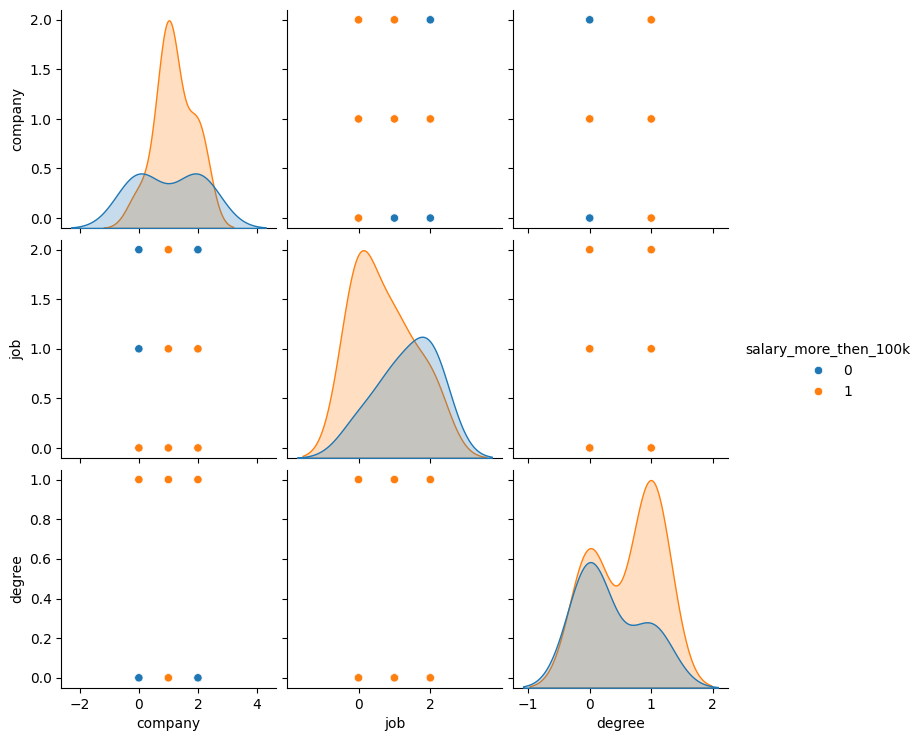

In [213]:
#using pairplot for analyzing the data
sns.pairplot(data=dataframe,hue='salary_more_then_100k')

In [214]:
#splitting the data into features and target variable
X=dataframe.drop(columns=['salary_more_then_100k'])
y=dataframe['salary_more_then_100k']

In [215]:
#splitting data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=42)

In [216]:
# Initialize the DecisionTreeClassifier with max_depth=5
classifier=DecisionTreeClassifier(max_depth=5)

# Fit the classifier to the training data
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [217]:
# Use the trained classifier to make predictions on the testing data (X_test)
testing_data = classifier.predict(X_test)

# Use the trained classifier to make predictions on the training data (X_train)
training_data = classifier.predict(X_train)


In [218]:
print("accuracy score on testing data is: ",accuracy_score(y_test,testing_data))
print("accuracy score on training data is: ",accuracy_score(y_train,training_data))

accuracy score on testing data is:  0.8333333333333334
accuracy score on training data is:  1.0


In this file using following columns build a model to predict if person would survive or not,PclassSexAgeFareCalculate score of your model


In [219]:
#importing necessary files
import matplotlib.pyplot as plt

In [220]:
#reading the titanic file in dataset
dataset=pd.read_csv("titanic.csv")
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [221]:
#checking null values
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [222]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [223]:
#dropping columns which will not affect the model
dataset.drop(['PassengerId','Name','SibSp','Parch', 'Ticket', 'Cabin', 'Embarked'], inplace=True, axis=1)  # axis = 1 defines column wise


In [224]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [225]:
# Calculate the mean age
median_age = dataset['Age'].median()

# Fill null values in the 'Age' column with the mean age
dataset['Age'] = dataset['Age'].fillna(median_age)
median_age


28.0

In [226]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [227]:
# mapping male to 0 and female to 1
sex_mapping={'male':0,'female':1}
dataset['Sex']=dataset['Sex'].map(sex_mapping)

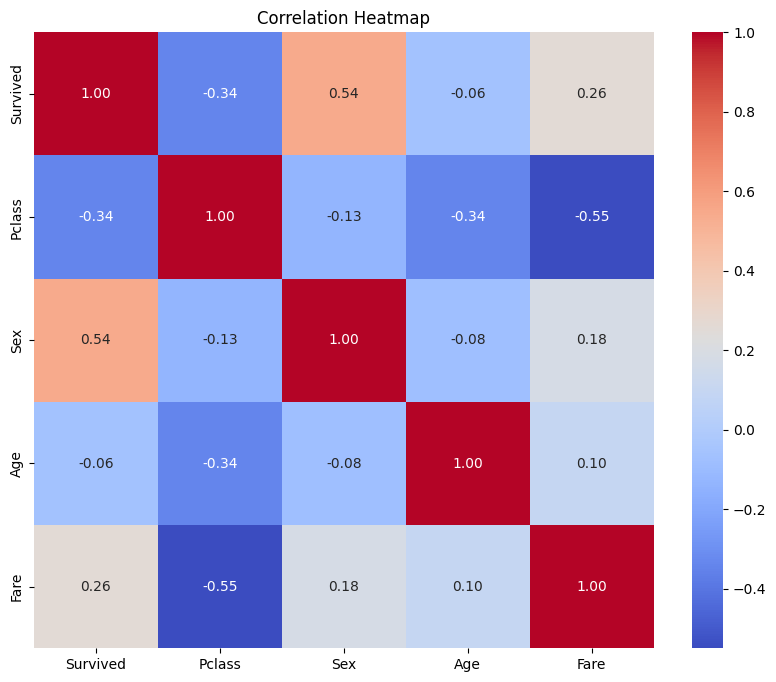

In [228]:
# checking the correlations between columns
correlation_matrix = dataset.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='Sex', ylabel='Survived'>

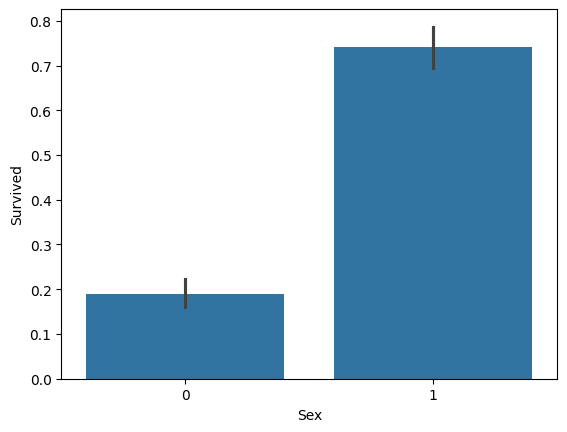

In [229]:
sns.barplot(x='Sex',y='Survived',data=dataset)  #plotting barplot between sex and survived

In [230]:
#splitting the data into features and target variable
X=dataset.drop(columns=['Survived'])
y=dataset['Survived']

#splitting data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [231]:
# Initialize the DecisionTreeClassifier with max_depth=4
classifier1=DecisionTreeClassifier(max_depth=4)
classifier1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [232]:
# Use the trained classifier to make predictions on the testing data (X_test)
test_predictions=classifier1.predict(X_test)

# Use the trained classifier to make predictions on the training data (X_train)
train_predictions=classifier1.predict(X_train)

In [233]:
print("accuracy score on testing data is: ",accuracy_score(y_test,test_predictions))
print("accuracy score on training data is: ",accuracy_score(y_train,train_predictions))

accuracy score on testing data is:  0.8246268656716418
accuracy score on training data is:  0.8475120385232745
